In [1]:
import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt8162428/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8482972/?ref_=ttep_ep2",
                   "https://www.imdb.com/title/tt9166672/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt9166678/?ref_=ttep_ep4",
                   "https://www.imdb.com/title/tt9166696/?ref_=ttep_ep5"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número

    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 1', 'nota': 9.5, 'votos': 42644}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 2', 'nota': 9.7, 'votos': 40300}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 3', 'nota': 9.6, 'votos': 37747}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 4', 'nota': 9.5, 'votos': 35323}, {'serie': 'Chernobyl', 'temporada': '1', 'episodio': ' 5', 'nota': 9.9, 'votos': 45621}]


In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("chernobyl.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,episodio,nota,serie,temporada,votos
4,5,9.9,Chernobyl,1,45621
1,2,9.7,Chernobyl,1,40300
2,3,9.6,Chernobyl,1,37747
0,1,9.5,Chernobyl,1,42644
3,4,9.5,Chernobyl,1,35323


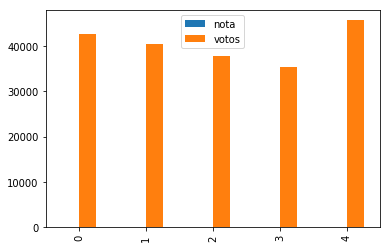

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot.bar()

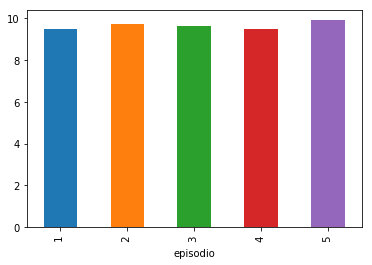

In [4]:
agrupamento = df.groupby("episodio")["nota"].mean()
agrupamento.plot.bar()